# 確率(probability)

#### データ準備

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#tips.csvのロード
df = sns.load_dataset('tips')
#合計に対してチップが占める割合のカラム"tip_rate"を追加する
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 確率分布(probability distribution)

In [4]:
#確率
#・ある試行を同じ条件で何度も繰り返した場合にある現象が起こる相対頻度の極限値
#　　サイコロを振って１が出た回数をサイコロを振った回数で割った値

#確率変数(X random variable)
#・値が確率的に変動する変数→それぞれの値に確率が紐づいている
# サイコロを振って出る目
# ３回コインを投げて表が出た回数
# 全国から1人選んだ時のその人の身長体重 etc...
#・それぞれの値に確率P(X)が対応している
# 
# サイコロの目 X  1    2   3   4   5   6
# 確率P(X)     1/6 1/6 1/6 1/6 1/6 1/6
# 
#確率変数を下記のように区別する
#・離散型確率変数
# 飛び飛びの値をとる
# サイコロを振って出た目とか
#・連続型確率変数
# 連続の値をとる
# ランダムに選んだ成人男性1人の身長とか

#確率分布
#・確率がどのように分布しているかを表したもの
#・確率変数は確率分布から生成された値、と考えるとわかりやすい
# 確率分布はデータ生成装置というイメージを持つ
#・サイコロの目のような分布を一様分布という
# 
#こちらも下記の様に区別する 
#・離散型確率分布
# 離散型確率変数の確率分布
#  この分布を数学的に扱えるようにした関数:確率質量関数(PMF Probability Mass Function)
#・連続型確率分布
# 連続型確率変数の確率分布
# １本の線で描けるような分布になる
#  この分布を数学的に扱えるようにした関数:確率密度関数(PDF Probability Density Function)

#確率分布を扱う
#stats.<確率分布>.<メソッド>
#確率分布
# norm
# uniform
# randint etc...
#メソッド
# rvs()
# pdf()
# cdf() etc...

#-例-
#サイコロの一様分布
#一様分布からランダムにデータを生成する(確率変数の値を確率分布から作る)
#使える確率分布は２つ
# ・randint:飛び飛びの整数だけを取る(離散型)
# ・uniform:連続した値を取る(連続型)
#確率変数を求めるメソッド
# rvs(random variates):確率変量。　確率変数の実際の値(サイコロで言えば、１や５などの、振って出た目のこと)
#
#randintを使う
#stats.randint.rvs(low, high)
#※lowからhigh-1までのランダムな整数を生成
#引数
# low:ここでは最小値の 1
# high:ここでは6+1で 7
stats.randint.rvs(1, 7)

2

In [8]:
#引数は確率分布の方に入れることもできる
#stats.randint(low, high).rvs()
#※1〜6の確率変量を持つ一様分布をrandint(low, high)で定義している
stats.randint(1, 7).rvs()

4

In [6]:
#rvs以外のメソッドの例
#期待値
#stats.randint.mean(low, high)
#※平均したサイコロの目
stats.randint.mean(1, 7)

3.5

In [2]:
#uniformを使う
#stats.uniform.rvs(loc, scale)
#※locからscaleまでのランダムな値(整数に限らない)を生成
#引数
# loc:始まりの値
# scale:終わりの値
stats.uniform.rvs(0, 1)

0.29552349687990387

In [3]:
#引数は確率分布の方に入れることもできる
#stats.uniform(loc, scale).rvs()
stats.uniform(0, 1).rvs()

0.6855319704287715

## 確率分布の描画

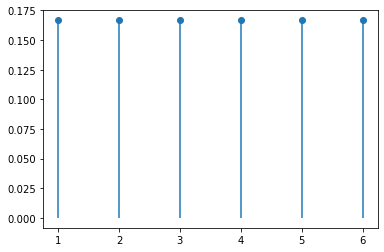

In [6]:
#一様分布を描画する
#・離散型確率分布:stats.randint(low, high).pmf(x)
#  PMF(Probability Mass Funciton):確率質量関数

#-例-
#サイコロの目が１である確率(どの目であっても全部同じ値になる)
#x軸の値を作る(サイコロの目1〜6)
x = np.arange(1, 7)
#x軸の値を渡してy軸の値を取得する(全部1/6=0.166...)
y = stats.randint(1, 7).pmf(x)

#確率分布の描画
#'o'を指定しないと横一直線になる(６つの点を横に結んでいる)
#横一直線だと連続した値を取る様に見えるので、点を表示して飛び飛びの値を取ることを表す
plt.plot(x, y, 'o')
#下から点まで縦線を引く
plt.vlines(x, 0, y)

In [5]:
#x軸の値の確認
x

array([1, 2, 3, 4, 5, 6])

In [6]:
#y軸の値の確認
y

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

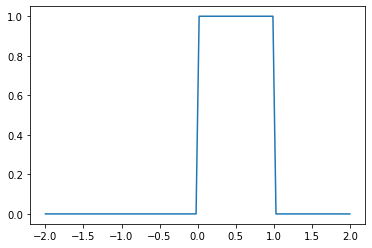

In [7]:
#連続型確率分布:stats.uniform(loc, scale).pdf(x)
#  PDF(Probablity Density Function):確率密度関数 

#-例-
#x軸の値:−2〜2に100個値を用意する
x = np.linspace(-2, 2, 100)
#y軸の値:0〜1の連続した値を返す
y = stats.uniform(loc=0, scale=1).pdf(x)

#確率分布の描画
#連続した１本の線となる
#この分布から生成されるデータは0~1のどこかの値。それを全て同じ確率で返してくれる(uniformという一様分布を指定したから)
#連続型の場合、確率は面積で考える(全面積は1)
plt.plot(x, y)

## 累積分布関数(CDF Cumulative Distribution Function)

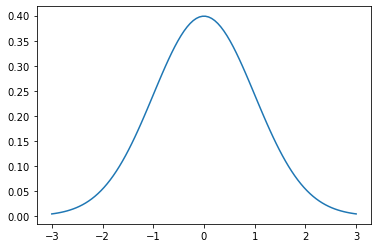

In [3]:
#確率密度(PDF)と確率
#・確率密度関数が描く面積が確率になる
# 必ず区間を設けて、その区間内に入る確率という形で面積を求めて確率を計算する
#・確率密度関数が描く全面積は1になる

#累積分布関数(CDF)
#・確率密度関数を負の最大限からある値(x)まで確率を積み上げた値を返す関数
# 累積分布関数が返す値を見れば、その値の確率がわかる
# 確率密度関数の面積をそのまま返す関数
# 
#-例-
# 確率密度関数
#　　　　ランダムに成人男性を選んだ場合に、その人が160cm以下である確率を0.3と仮定する
# 　　x:160
#  面積(確率):0.3
#  　　　　　　↓
# 累積分布関数
# 　　x:160
#  y(縦軸の値):0.3

#(正規分布の)確率密度関数→面(面積)
#PDF:stats.norm.pdf(x)
#x軸
x = np.linspace(-3, 3, 100)
#yの値(PDF)
y = stats.norm.pdf(x)

#(正規分布の)確率密度関数の描画
plt.plot(x, y)

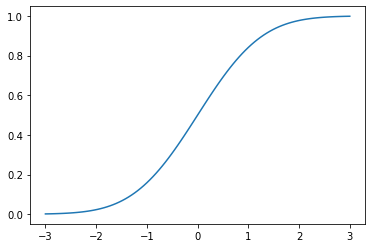

In [4]:
#累積分布関数→線
#確率密度関数を負の無限大からある値(x)まで確率を積み上げた値を返す→そのx値における左側の面積を計算している
#CDF:stats.norm.cdf(x)
#x軸
x = np.linspace(-3, 3, 100)
#y軸(確率密度関数の全面積は1なので、1が最大)
y = stats.norm.cdf(x)

#累積分布関数の描画
#※CDFを描画することで、複数の分布の差異を視覚的に理解できる
plt.plot(x, y)

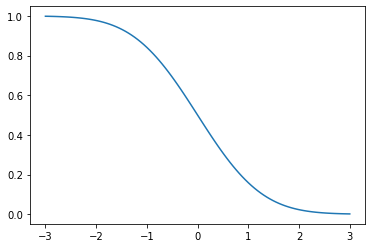

In [5]:
#累積分布関数(CDF)の右側(1-CDF)→CDFの左右対称の線
#確率密度関数にて、そのx値における右側の面積を計算している
#SF(Survival Function):stats.norm.sf(x)
#x軸
x = np.linspace(-3, 3, 100)
#y軸(確率密度関数の全面積は1なので、最大の1から下がっていく)
y = stats.norm.sf(x)

#SFの描画
plt.plot(x, y)

## 正規分布(normal distribution)

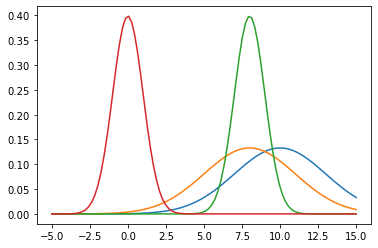

In [4]:
#正規分布の特徴
#・確率分布の１つ
#・ガウス分布、ベルカーブとも呼ばれる
#・最もよく使われる分布
#・自然界の多くで見られる分布(身長、誤差 etc...)
#・統計学の理論でもよく出てくる分布
#・平均μと分散σ2だけで形状が決まる
# 平均μのところに山の頂上がくる
# 分散が大きければ横に広くなる
# 分散が小さければ縦に細長くなる

#stats.norm(loc, scale).<メソッド>
#確率分布normの引数
# loc:平均
# scale:標準偏差σ※分散ではない
#確率分布normのメソッド
# .rvs():random variates(random variables) 確率変量　    分布から確率に沿った形でランダムに値を取得する
# .pdf():probability density function      確率密度関数　 指定した値xに対する値y
# .cdf():cumulative distribution function  累積分布関数 　指定した値xに対する値y
# .sf():survival function                  1-累積分布関数(CDF)
# .mean():平均
# .var():分散
# .std():標準偏差 etc...
#下記の書き方のどちらでもOK
#stats.norm.pdf(x, loc, scale)
#stats.norm(loc, scale).pdf(x)
#※locとscaleを何も指定しなかったら、平均0 標準偏差1の正規分布になる(標準正規分布)

#-例-
#複数の正規分布を一度に描画する
#x
x = np.linspace(-5, 15, 100)
#y:平均10 標準偏差3
y = stats.norm(loc=10, scale=3).pdf(x)
#y2:平均8 標準偏差3
y2 = stats.norm(loc=8, scale=3).pdf(x)
#y3:平均8 標準偏差1※分散が小さくなって縦に細長いものになる
y3 = stats.norm(loc=8, scale=1).pdf(x)
#y4:平均0 標準偏差1(標準正規分布)
y4 = stats.norm(loc=0, scale=1).pdf(x)

#それぞれの分布を描画
plt.plot(x, y)  #青
plt.plot(x, y2) #黄
plt.plot(x, y3) #緑
plt.plot(x, y4) #赤

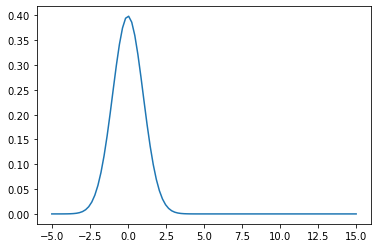

In [5]:
#標準正規分布(standard normal distribution)
#・平均0　分散1の正規分布(正規分布を標準化したもの)
#・標準正規分布は全部同じ形をしている
# どこにあるかという平均の部分
# どれくらい尖っているかという分散の部分
# が大事

#デフォルトでは(=パラメータを何も指定しなければ)
# 平均(loc)=0
# 標準偏差(scale)=1
#の正規分布になる→標準正規分布
y = stats.norm().pdf(x)
plt.plot(x, y)

## カーネル密度推定(KDE Kernel Density Estimation)

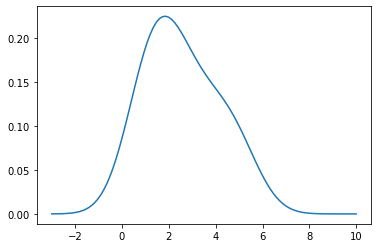

In [8]:
#カーネル密度推定の特徴
#・観測した分布(手元にあるデータ)から、その背後にある確率密度関数(確率分布)を推定する
# →連続型確率分布について使うもの

#stats.gaussian_kde(dataset).<メソッド>
#確率分布gaussian_kdeの引数
# dataset:実際のデータのArray
#確率分布gaussian_kdeのメソッド
# .resample(x):KDE後の確率分布から新たなデータを取得する(リサンプルする)
# .pdf(x)     :確率密度関数を計算する

#-例-
#KDEを描画する
#x軸
x = np.linspace(-3, 10, 100)
#y:KDEの値
y = stats.gaussian_kde([1, 1, 2, 2, 3, 4, 5]).pdf(x)

#KDEの描画
plt.plot(x, y)

#結果
#・xは2,3あたりに集中しているので、その辺りの確率が高くなっている
#・データは[1, 1, 2, 2, 3, 4, 5]だが、KDEをすると余分に分布を取る
#・推定した確率分布は実際に取得した↑のデータの背後にある分布
# →今回たまたま1を取得したが、0.9を取得したかも知れないと考えると、0.9にも確率を持っている
# →KDEを実行すると、必ずしも実際に得られたデータにだけ確率があるとは限らないので注意！

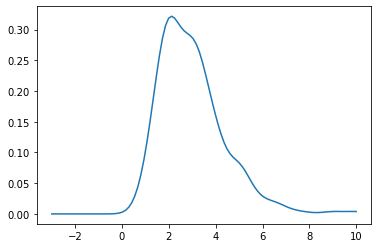

In [10]:
#-例-
#tip列をKDEする

#tipの確率分布を推定値で見る
x = np.linspace(-3, 10, 100)
#tipの分布に対してKDEする
y = stats.gaussian_kde(df['tip']).pdf(x)
#KDEを描画
plt.plot(x, y)

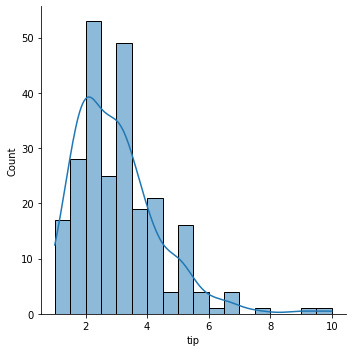

In [18]:
#ヒストグラムとKDEを同時に描画する方法
#sns.displot(a, kde=True)

sns.displot(df['tip'], kde=True)
#ヒストグラムも重要だが、より興味があるのはその標本の背後の母集団
#なので、KDEも一緒に描画する

In [11]:
#リサンプルする
#データを生み出してみる(この確率分布から再度標本を取る)

#-例-
resample_data = stats.gaussian_kde(df['tip']).resample()
resample_data

#ただし、KDEを実行するとマイナス値も入ることがあるので注意(実際に分布しているデータよりも広い範囲で確率をとることになるため)
#-KDEの境界線がある場合(マイナス値になった、最大値を超えた等)の解決策-
#境界線を超えた確率はミラーリングさせる


array([[ 1.73326398,  3.22456359,  2.44465831,  4.24720583,  0.87904048,
         2.16243629,  2.71749975, 10.8185202 ,  2.24404793,  2.67532224,
         3.58900551,  2.19246575,  2.58668171,  2.78229302,  2.46161482,
         3.68015961,  2.77241032,  1.47582539,  4.526099  ,  3.48909211,
         2.03282069,  3.32927054,  1.9263588 ,  1.17884827,  6.25848552,
         3.04558773,  4.92758124,  5.45094584,  4.03464543,  1.22340367,
         3.27206816,  9.21162748,  2.60291827,  0.95706648,  1.60420673,
         1.24345408,  2.4549864 ,  8.95410363,  3.25953739,  5.73812823,
         3.01214792,  2.61989535,  1.30941014,  3.36080651,  4.86647586,
         5.04239344,  2.5805852 ,  2.6931243 ,  1.58548589,  3.54083933,
         1.4728733 ,  1.79549714,  0.88154339,  1.55051737,  2.22911303,
         1.99101594,  1.65150814,  4.88042341,  2.60731619,  3.12402437,
         2.32022743,  4.05485735,  1.67746408,  2.11754006,  3.13723068,
         2.96431811,  4.18763387,  2.33421244,  1.7

## 68-95-99.7ルール

In [2]:
#平均μと分散σ2の正規分布におけるデータの分布のルール付け(正規分布の特徴)
# μ ± σ (１標準偏差): 約68%
# μ ± 2σ(2標準偏差): 約95%
# μ ± 3σ(3標準偏差): 約99.7~100%

#-例-
#平均４、標準偏差3の正規分布からランダムに値を1000個取得し、
#それぞれの割合が６８％,９５%,99.7%になるかを確認
samples = [] #全部の値の配列
group1 = []  #第１グループの配列
group2 = []  #第2グループの配列
group3 = []  #第3グループの配列
lc = 4       #平均
scl = 3      #標準偏差

for i in range(1000):
    #正規分布からランダムに値を取る
    sample = stats.norm(loc=lc, scale=scl).rvs()
    #取得した値は全て保持しておく
    samples.append(sample)

    #取得した値がどこに属するかを確認する
    #第１グループ(68%)
    if lc-scl < sample < lc+scl:
        group1.append(sample)
    #第2グループ(95%)
    elif lc-2*scl < sample < lc+2*scl:
        group2.append(sample)
    #第3グループ(99.7~100%)
    elif lc-3*scl < sample < lc+3*scl:
        group3.append(sample)

#結果表示
print("-- length check-- ")
print("sanmples             len: {}".format(len(samples)))
print("group1+group2+group3 len: {}".format(len(group1)+len(group2)+len(group3)))
print("    group1           len: {}".format(len(group1)))
print("    group2           len: {}".format(len(group2)))
print("    group3           len: {}".format(len(group3)))
print("\n")
print("-- 68-95-99.7 rule check-- ")
print("check 68%   - group1/samples:                 {}%".format((len(group1)/len(samples)*100)))
print("check 95%   - (group1+group2)/samples:        {}%".format(((len(group1)+len(group2))/len(samples)) * 100))
print("check 99.7% - (group1+group2+group3)/samples: {}%".
      format(((len(group1)+len(group2)+len(group3))/len(samples))*100))

-- length check-- 
sanmples             len: 1000
group1+group2+group3 len: 998
    group1           len: 678
    group2           len: 285
    group3           len: 35


-- 68-95-99.7 rule check-- 
check 68%   - group1/samples:                 67.80000000000001%
check 95%   - (group1+group2)/samples:        96.3%
check 99.7% - (group1+group2+group3)/samples: 99.8%


## 標準化

$
z = \frac{x_i - \bar{x}}{s}
$

In [7]:
#標準化とは
#・平均を0、分散を1にすること(z得点)
#・標準化することによって尺度を揃えることができ、複数のデータセットを比較することが可能となる
#
#標準化のやり方
#・各値から平均を引き、標準偏差で割る
#
#　 これでなぜ平均0、分散1になるのか？
#  それぞれの値を足し、データ数で割ると平均が求められる
#  ↓
#  平均が0になるためには、平均を引く
#  
#  それぞれの値と平均の偏差の２乗の平均をとって分散が求められる
#  ↓
#  分散を1にするには、1/分散をかける

#偏差値(T-score)
#・標準化を応用したもの
#・平均を50、標準偏差を10にすること(T得点)
#　　z得点x10+50

#sklearn.prerpocessing.StandardScaler
#・機械学習の前処理として実施されることが多い
#・インスタンスを生成して使う
scaler = StandardScaler()

In [5]:
#scaler.fit_transform(data)
#2次元のデータ(※)に対して標準化をする
#※表形式のデータや、DataFrameに対してそのまま標準化することが多いため。1次元データだとエラーになる
#  1次元のデータの場合は2次元に変換する
#インスタンス
# scaler(名前は任意)
#引数
# data：２次元のデータ
scaler.fit_transform([[1, 30], [2, 50], [3, 10], [4,23]])

array([[-1.34164079,  0.12099577],
       [-0.4472136 ,  1.50380456],
       [ 0.4472136 , -1.26181302],
       [ 1.34164079, -0.36298731]])

In [8]:
#-例-
#tip_rateをfit_transform()で標準化する
#　df['tip_rate']:
# これはSeries1つだけなので、NumpyArrayに変換してから標準化する必要がある
# 　→valuesで一次元し、reshape()で二次元
scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1))

array([[-1.66301817e+00],
       [-4.28234299e-03],
       [ 9.49146717e-02],
       [-3.44925940e-01],
       [-2.29624968e-01],
       [ 4.17363756e-01],
       [ 1.10337948e+00],
       [-7.33936144e-01],
       [-5.00163567e-01],
       [ 9.47315739e-01],
       [ 9.35535257e-02],
       [-3.11727577e-01],
       [-9.67838090e-01],
       [ 3.24134057e-02],
       [ 7.02885077e-01],
       [ 3.42053237e-01],
       [ 1.41511894e-02],
       [ 1.09840651e+00],
       [ 7.45627991e-01],
       [ 2.33813456e-02],
       [ 1.09728238e+00],
       [-4.14587519e-01],
       [-3.18225155e-01],
       [ 5.16606793e-01],
       [-5.88357399e-03],
       [-4.82644844e-01],
       [-1.83995336e-01],
       [-5.24746516e-02],
       [ 6.12895542e-01],
       [-1.33408300e-01],
       [-1.47179215e-01],
       [-4.03019490e-01],
       [ 6.30066304e-01],
       [-6.95488521e-01],
       [ 3.79214012e-01],
       [-1.83383264e-01],
       [-6.26420825e-01],
       [ 3.36888626e-01],
       [-6.1

In [10]:
#　df['tip_rate']のNumpyArrayへの変換確認
df['tip_rate'].values.reshape(-1, 1).shape

#結果:(244, 1)
#  dfは244行のデータがあるので、↑だと１列244行のArrayに変換される
#  行数は分からないことが多いので、−1を指定する。こうすることでデータの長さが取れる

#reshape(-1, 2)
#これだと２列122行

(244, 1)

In [20]:
#実際に標準化するときは1つのデータセットだけではなく、複数のデータに対して標準化することが多い
#
#-例-
#total_billとtip_rateの標準化
#total_billとtip_rateですでに2次元なので、reshapeする必要はない
scaler.fit_transform(df[['total_bill', 'tip_rate']])

array([[-3.14711305e-01, -1.66301817e+00],
       [-1.06323531e+00, -4.28234299e-03],
       [ 1.37779900e-01,  9.49146717e-02],
       [ 4.38315103e-01, -3.44925940e-01],
       [ 5.40744704e-01, -2.29624968e-01],
       [ 6.19536705e-01,  4.17363756e-01],
       [-1.23995452e+00,  1.10337948e+00],
       [ 7.98507107e-01, -7.33936144e-01],
       [-5.34203307e-01, -5.00163567e-01],
       [-5.63468908e-01,  9.47315739e-01],
       [-1.07111451e+00,  9.35535257e-02],
       [ 1.74175992e+00, -3.11727577e-01],
       [-4.91430507e-01, -9.67838090e-01],
       [-1.52624903e-01,  3.24134057e-02],
       [-5.57840908e-01,  7.02885077e-01],
       [ 2.01939101e-01,  3.42053237e-01],
       [-1.06436091e+00,  1.41511894e-02],
       [-3.93503306e-01,  1.09840651e+00],
       [-3.16962505e-01,  7.45627991e-01],
       [ 9.72582994e-02,  2.33813456e-02],
       [-2.10030504e-01,  1.09728238e+00],
       [ 5.67366990e-02, -4.14587519e-01],
       [-4.52034507e-01, -3.18225155e-01],
       [ 2.

In [12]:
#偏差値を求める場合(標準化した値に10をかけて５０を足す)
scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1))
scaled * 10 + 50

array([[ 33.36981828],
       [ 49.95717657],
       [ 50.94914672],
       [ 46.5507406 ],
       [ 47.70375032],
       [ 54.17363756],
       [ 61.03379478],
       [ 42.66063856],
       [ 44.99836433],
       [ 59.47315739],
       [ 50.93553526],
       [ 46.88272423],
       [ 40.3216191 ],
       [ 50.32413406],
       [ 57.02885077],
       [ 53.42053237],
       [ 50.14151189],
       [ 60.98406513],
       [ 57.45627991],
       [ 50.23381346],
       [ 60.97282376],
       [ 45.85412481],
       [ 46.81774845],
       [ 55.16606793],
       [ 49.94116426],
       [ 45.17355156],
       [ 48.16004664],
       [ 49.47525348],
       [ 56.12895542],
       [ 48.665917  ],
       [ 48.52820785],
       [ 45.9698051 ],
       [ 56.30066304],
       [ 43.04511479],
       [ 53.79214012],
       [ 48.16616736],
       [ 43.73579175],
       [ 53.36888626],
       [ 43.8951679 ],
       [ 49.8515239 ],
       [ 46.52948726],
       [ 47.48515471],
       [ 59.63290777],
       [ 45

## 二項分布(Binomial distribution)

$
P(x) = _nC_xp^xq^{n-x} = \frac{n!}{x!(n-x)!}p^xq^{n-x}
$

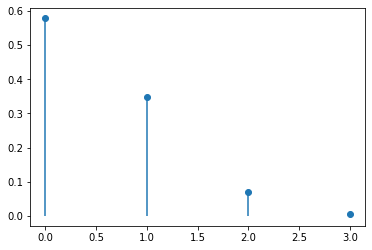

In [14]:
#二項分布の特徴
#・様々な確率分布の基礎となる分布
#・正規分布も二項分布を発展させたもの
#・ある観察や試行を複数回行った時にある事象が起こる回数が従う確率分布
#　　例
#  サイコロを３回投げて２がn回出る確率(n!/x!(n-x)!)が従う確率分布
#    ０回: 5/6 ^3 = 125/216
#    1回: 3*(1/6)(5/6)^2 = 75/216 ※１回目に出る、２回目に出る、３回目に出る　３パターンあるので3をかける
#    2回: 3*(1/6)^2(5/6) = 15/216
#    ３回: 1/6 ^3 = 1/216
#  コインを１０回投げて表がn回出る確率が従う確率分布　etc・・・

#二項分布を描画する
#試行回数x回と確率pで決まる
#stats.binom(n, p).<メソッド>
#確率分布の引数
# n:試行回数(サイコロを３回投げる)
# p:確率(サイコロの目で２が出る確率1/6)
#binomのメソッド
# pmf(x):probability mass function 確率質量関数。離散型(飛び飛びの値)の確率分布

#-例-
#サイコロの目の二項分布を描画する
n = 3   #試行回数(サイコロを投げた回数)
p = 1/6 #確率(サイコロの目の確率)

#xの値(離散型)を作る
x = np.arange(n + 1)
#二項分布(xに対する確率)
y = stats.binom(n, p).pmf(x)

#二項分布を描画する
#離散型の確率分布を描きたいので、点と点を線で結ばない
plt.plot(x, y, 'o')
#点とx軸の間に線を引く
plt.vlines(x, 0, y)

## 二項分布→正規分布

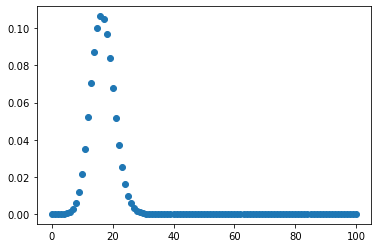

In [4]:
#二項分布と正規分布
#・二項分布のn(試行回数とか)を無限大にした分布は正規分布に近似する
# npを一定にしてnを無限大にした場合はポワソン分布に近似する
#　　例
#  サイコロを100回投げて２がn回出る確率
#    ０回出る確率より１回出る確率のほうが大きい
#    1回出る確率より2回出る確率のほうが大きい
#    2回出る確率より3回出る確率のほうが大きい
#    ・・・
#    →最も確率が高いのは、100x1/6=１７回あたり
#    　　ここを越すと確率が下がっていく
#   
#   →イメージすると、正規分布っぽくなりそう
#    平均np、分散npqの正規分布に近似できる ※q = 1-p

#-例-
#二項分布が正規分布に近似することをサイコロの目の確率で確認する
n = 100 #サイコロを投げた回数(平均)
p = 1/6 #サイコロの目の確率(確率)

#xの値(離散型)を作る
x = np.arange(n+1)
#二項分布
y = stats.binom(n, p).pmf(x)

#描画する(点を打つ)
plt.plot(x, y, 'o')

#結果
# 正規分布の形となっている
# 17あたりの確率が最も高いことがわかる

In [6]:
#平均npの確認 100x1/6
stats.binom(n, p).mean()

16.666666666666664

In [10]:
n*p

16.666666666666664

In [9]:
#分散npqの確認 100x1/6x5/6
stats.binom(n, p).var()

13.888888888888888

In [11]:
n*p*(1-p)

13.888888888888888

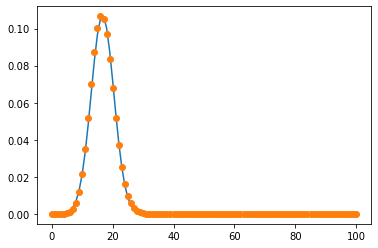

In [12]:
#-例-
#nを大きくすると、平均np、分散npqの正規分布に近似すること確認する
#平均np、分散npqの正規分布を同じx軸を使って描画してみる

#正規分布は連続型確率分布
#pdf:確率密度関数
#※qは設定されていないので、1-p
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)

#描画
plt.plot(x, y2)
#二項分布を重ねる
plt.plot(x, y, 'o') 